In [3]:
!pip install tensorflow-gpu

In [5]:
import tensorflow as tf

In [25]:
!pip install opencv-python
import cv2

In [26]:
import numpy as np

In [8]:
import pandas as pd


In [9]:
tf.__version__

'2.10.1'

In [12]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization

In [13]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 212s 1us/step


In [15]:
import pathlib
data_dir= pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [16]:
flowers_images_dict={ 'roses': list(data_dir.glob('roses/*')),
                    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,}

In [17]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


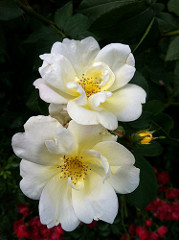

In [19]:
import PIL
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

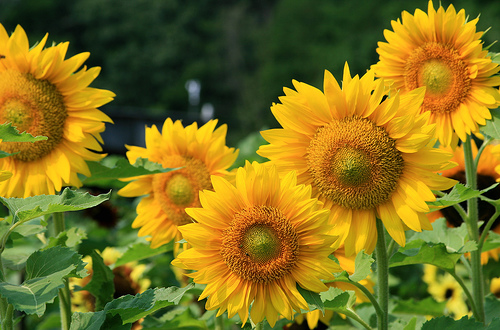

In [20]:
sf = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sf[0]))

In [27]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [28]:
X = np.array(X)
y = np.array(y)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [31]:
# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))

# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0

In [32]:
model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)

In [33]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  X_train_scaled,y_train,
    validation_split=0.34,
  epochs=6
)

Epoch 1/6


C:\Users\Saurabh\anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


57/57 [==============================] - 78s 1s/step - loss: 2.2335 - accuracy: 0.3761 - val_loss: 21.3142 - val_accuracy: 0.1976
Epoch 2/6
57/57 [==============================] - 93s 2s/step - loss: 1.6200 - accuracy: 0.4246 - val_loss: 2.2822 - val_accuracy: 0.3729
Epoch 3/6
57/57 [==============================] - 97s 2s/step - loss: 1.4098 - accuracy: 0.4681 - val_loss: 2.0193 - val_accuracy: 0.3750
Epoch 4/6
57/57 [==============================] - 98s 2s/step - loss: 1.3262 - accuracy: 0.4983 - val_loss: 2.2113 - val_accuracy: 0.4434
Epoch 5/6
57/57 [==============================] - 97s 2s/step - loss: 1.2494 - accuracy: 0.5204 - val_loss: 1.8453 - val_accuracy: 0.4124
Epoch 6/6
57/57 [==============================] - 98s 2s/step - loss: 1.2018 - accuracy: 0.5352 - val_loss: 1.1434 - val_accuracy: 0.5310


In [34]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 12s 422ms/step - loss: 1.2103 - accuracy: 0.5065


[1.2102664709091187, 0.5065359473228455]

In [35]:
import matplotlib.pyplot as plt

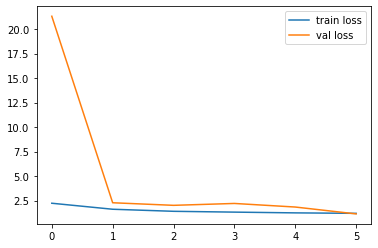

<Figure size 432x288 with 0 Axes>

In [40]:
# plot the loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

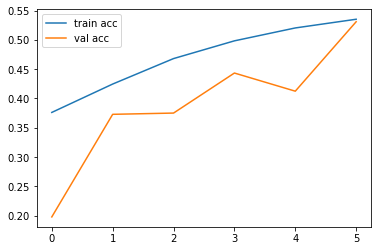

<Figure size 432x288 with 0 Axes>

In [42]:
# plotthe accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')